In [51]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

[*********************100%***********************]  1 of 1 completed
Int64Index([0, 1, 2, 3, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17], dtype='int64', name='Date')
[*********************100%***********************]  1 of 1 completed
Int64Index([ 0,  1,  2,  3,  6,  7,  8,  9, 10, 13, 14, 15, 16, 17, 20, 21, 22,
            23, 24, 27, 28, 29, 30],
           dtype='int64', name='Date')
[*********************100%***********************]  1 of 1 completed
Int64Index([0, 1, 2, 3, 7, 8, 9, 10, 13, 14, 15, 16, 17, 21, 22, 23, 24, 27,
            28, 29, 30],
           dtype='int64', name='Date')
[*********************100%***********************]  1 of 1 completed
Int64Index([0, 1, 2, 3, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24,
            28, 29, 30],
           dtype='int64', name='Date')
[*********************100%***********************]  1 of 1 completed
Int64Index([ 0,  1,  2,  3,  6,  7,  8,  9, 10, 13, 14, 15, 16, 17, 20, 21, 22,
            23, 24, 27, 28, 29, 30],
        

C:\Users\18hli\AppData\Local\Temp\ipykernel_24056\2679155906.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i, figsize = (15, 4))


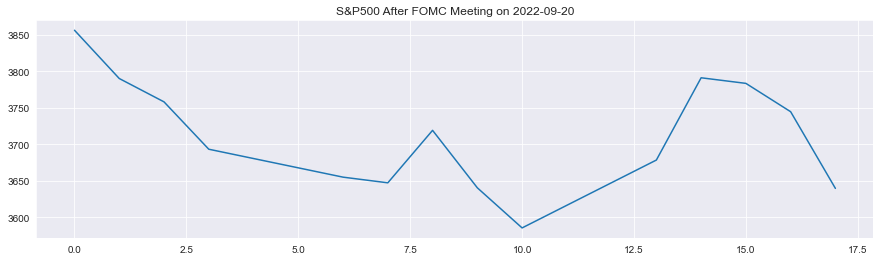

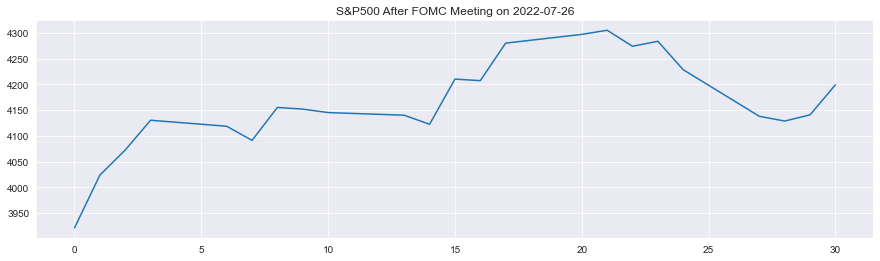

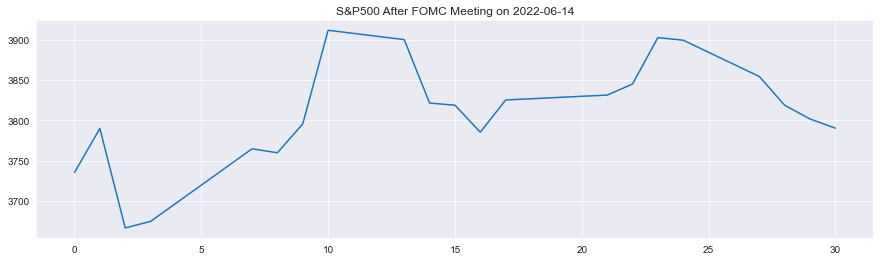

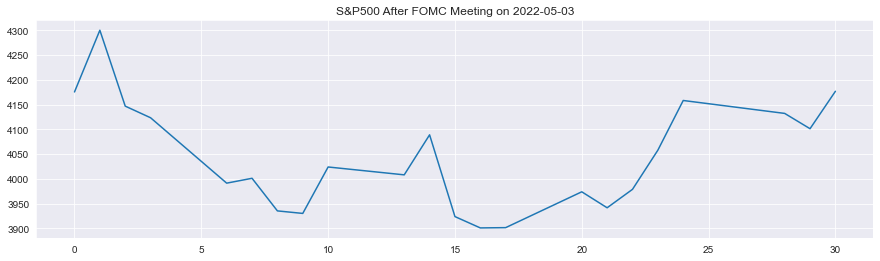

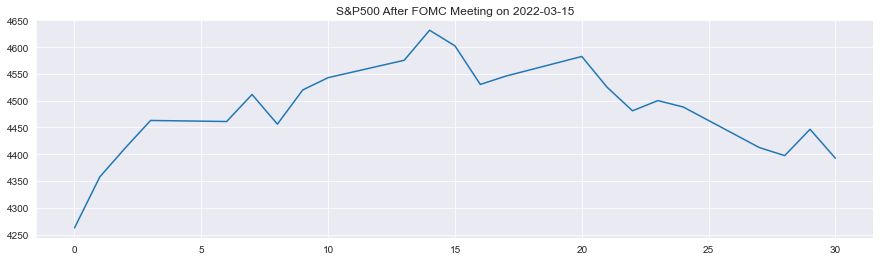

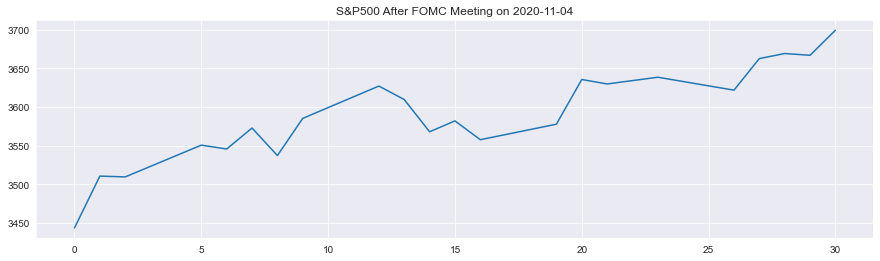

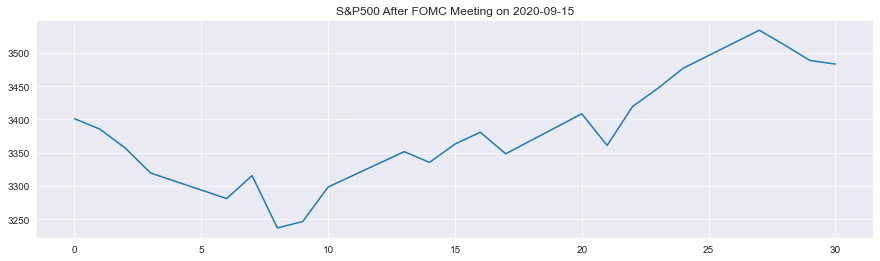

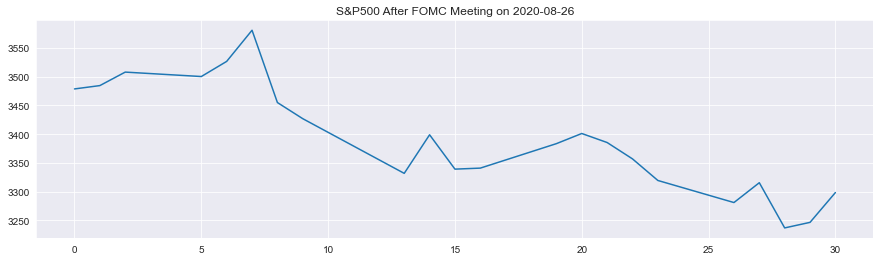

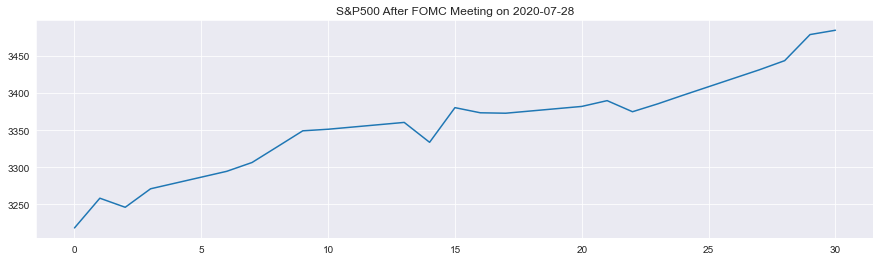

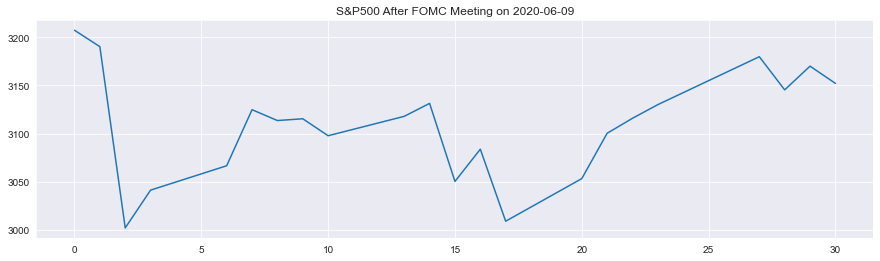

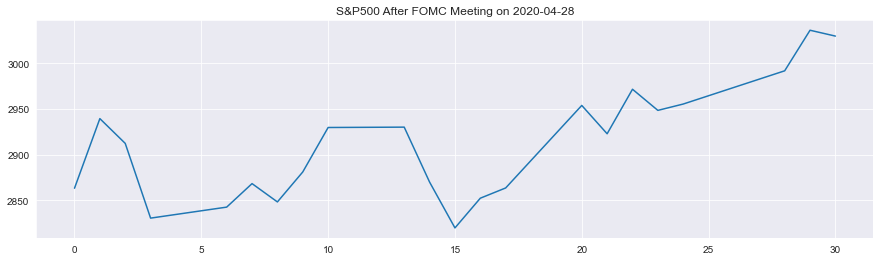

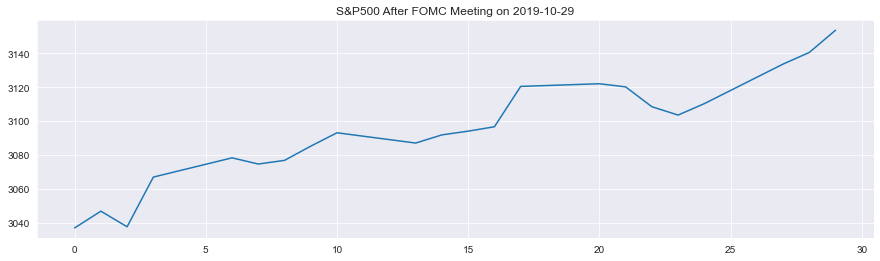

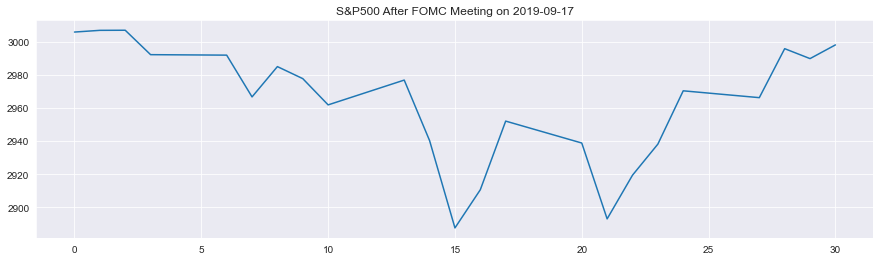

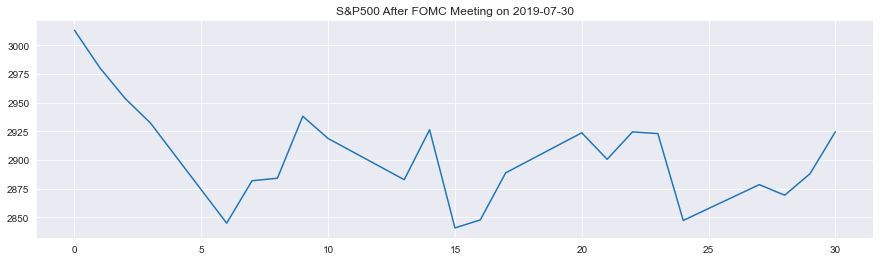

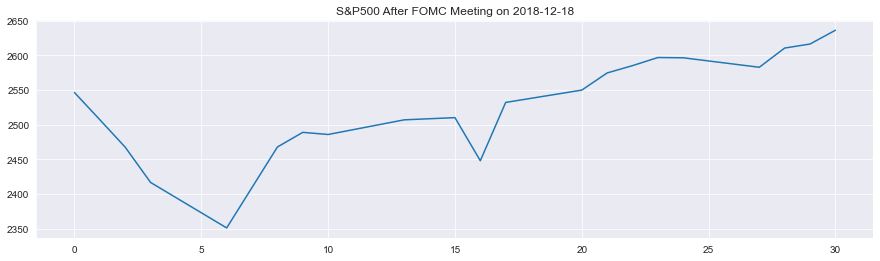

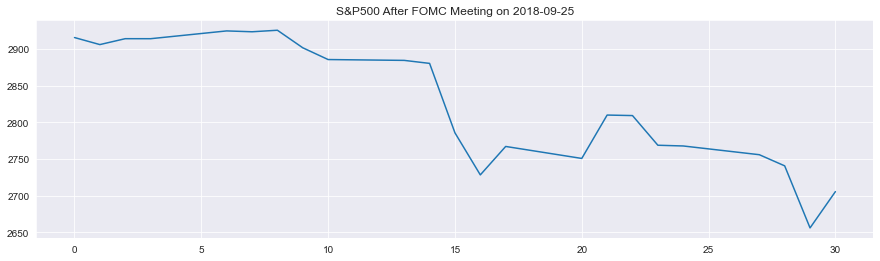

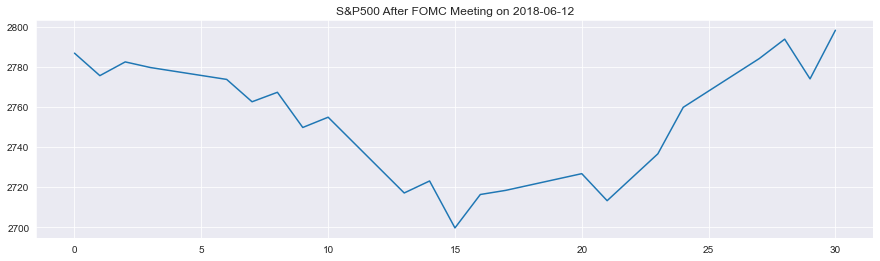

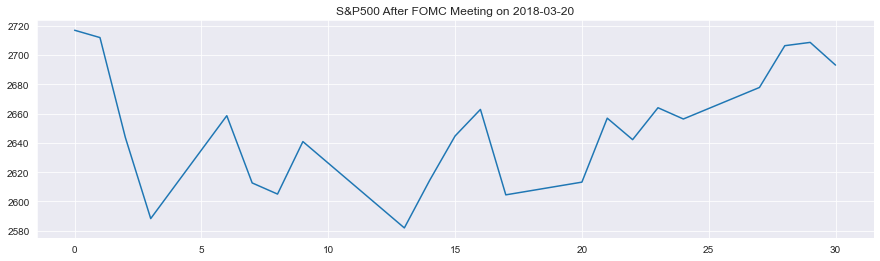

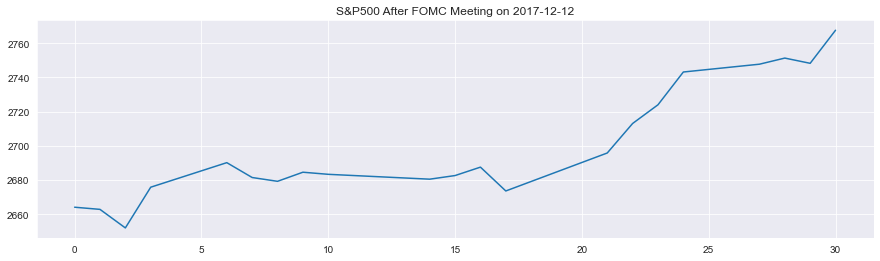

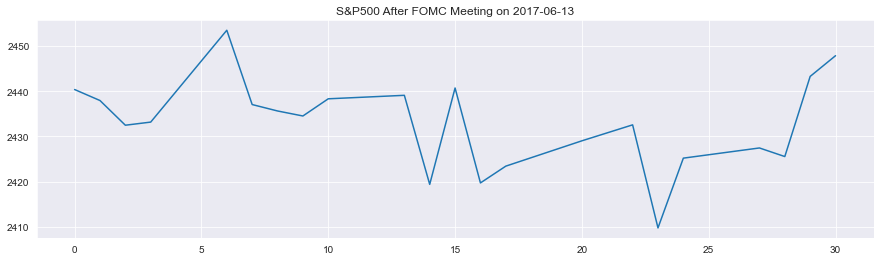

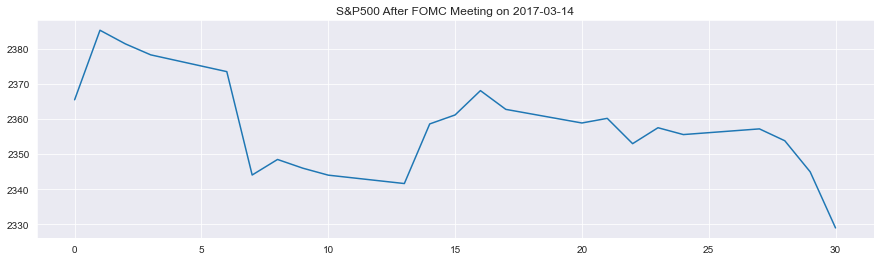

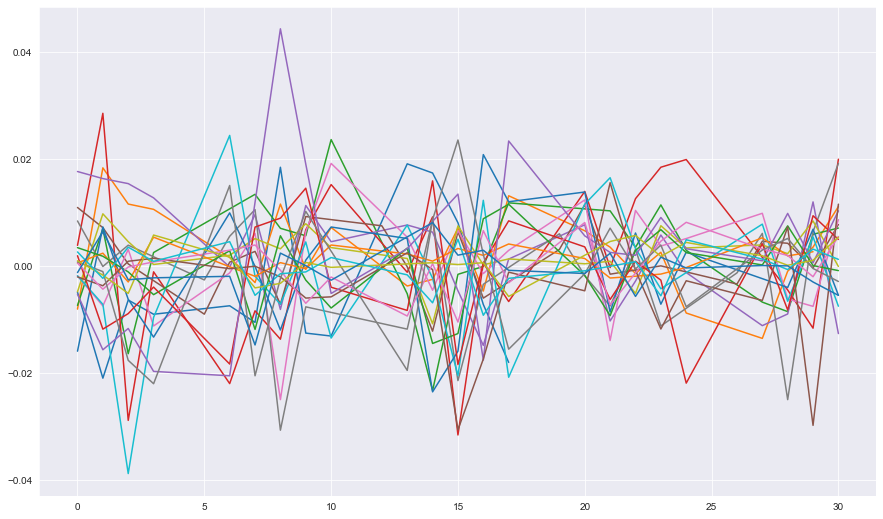

In [53]:
## List of FOMC dates

start_date = [
    "2022-09-21", "2022-07-27", "2022-06-15", "2022-05-04", "2022-03-16", 
    "2020-11-05", "2020-09-16", "2020-08-27", "2020-07-29", "2020-06-10", "2020-04-29",
    "2019-10-30", "2019-09-18", "2019-07-31", 
    "2018-12-19", "2018-09-26", "2018-06-13", "2018-03-21",
    "2017-12-13", "2017-06-14", "2017-03-15"
    ]
end_date = []

for i in range(len(start_date)):
    start_date[i] = datetime.strptime(start_date[i], "%Y-%m-%d") - timedelta(days = 1)
    end_date.append(start_date[i] + timedelta(days = 31))
    start_date[i] = datetime.strftime(start_date[i], "%Y-%m-%d")
    end_date[i] = datetime.strftime(end_date[i], "%Y-%m-%d")

def collectData(ticker): ## Plot 30 days movement of ticker after FOMC dates. Last plot combines every dates.
    plt.figure(len(start_date), figsize = (15, 9))
    for i in range(len(start_date)):
        data = pdr.get_data_yahoo(ticker, start=start_date[i], end=end_date[i])
        x = data.index
        shift = datetime.strptime(start_date[i], "%Y-%m-%d")
        shift = shift.replace(tzinfo = timezone.utc)
        yPercent = (data['Close'] - data['Open']) / data['Open']
        y = data['Close']
        x = (x - shift).days
        print(x)
        plt.figure(i, figsize = (15, 4))
        plt.plot(x, y)
        plt.title("S&P500 After FOMC Meeting on {}".format(start_date[i]))
        plt.figure(len(start_date))
        plt.plot(x, yPercent)

collectData('^GSPC') ## Ticker for S&P500
